<h3>Initial steps</h3>

In [2]:
cd /Users/charuta/Documents/Academics/Semester_1/Data_Science/Homework_2

/Users/charuta/Documents/Academics/Semester_1/Data_Science/Homework_2


In [3]:
# importing the required libraries

import numpy as np
import pandas as pd
import scipy as sp
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# reading the dataset
properties = pd.read_csv('./input/properties_2016.csv')
train_df = pd.read_csv("./input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df = pd.merge(train_df, properties, on='parcelid', how='left')

/Users/charuta/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1>Question 1</h1>

In [4]:
interesting_variables = []
interesting_variables.append('roomcnt')
interesting_variables.append('bedroomcnt')
interesting_variables.append('bathroomcnt')
interesting_variables.append('unitcnt')
interesting_variables.append('fireplacecnt')
interesting_variables.append('garagecarcnt')
interesting_variables.append('poolsizesum')
interesting_variables.append('finishedsquarefeet15')
interesting_variables.append('taxvaluedollarcnt')

labels = {}
labels['roomcnt'] = '01 Room count'
labels['bedroomcnt'] = '02 Bedroom count'
labels['bathroomcnt'] = '03 Bathroom count'
labels['unitcnt'] = '04 Unit count'
labels['fireplacecnt'] = '05 Fireplace count'
labels['garagecarcnt'] = '06 Garage count'
labels['poolsizesum'] = '07 Pool size sq ft'
labels['finishedsquarefeet15'] = '08 Total area sq ft'
labels['taxvaluedollarcnt'] = '09 Tax value'

coeffs = []
for elem1 in interesting_variables:
    for elem2 in interesting_variables:
        if elem1 == elem2:
            continue
        operate = properties[[elem1, elem2]]
        operate = operate.dropna(axis=0, how='any')
        if len(operate[elem1].unique()) == 1 or len(operate[elem2].unique()) == 1:
            continue
        pearson_coeff = sp.stats.pearsonr(operate[elem1], operate[elem2])
        coeffs.append([labels[elem1], labels[elem2], pearson_coeff[0]])

coeffs2 = []
for elem in interesting_variables:
    operate = train_df[[elem, 'logerror']]
    operate = operate.dropna(axis=0, how='any')
    pearson_coeff = sp.stats.pearsonr(operate[elem], operate['logerror'])
    coeffs2.append([labels[elem], '10 Log error', pearson_coeff[0]])
    coeffs2.append(['10 Log error', labels[elem], pearson_coeff[0]])

coeffs2.append(['10 Log error', '10 Log error', 1.0])

for elem in coeffs:
    coeffs2.append(elem)

for elem in interesting_variables:
    coeffs2.append([labels[elem], labels[elem], 1.0])

headers = ['Property 1', 'Property 2', 'Pearson Coefficient']
coeffs_plot = DataFrame(coeffs2, columns=headers)

coeffs_plot_pivot = coeffs_plot.pivot("Property 1", "Property 2", "Pearson Coefficient")

coeffs_plot_pivot

Property 2,01 Room count,02 Bedroom count,03 Bathroom count,04 Unit count,05 Fireplace count,06 Garage count,07 Pool size sq ft,08 Total area sq ft,09 Tax value,10 Log error
Property 1,,,,,,,,,,
01 Room count,1.000000,0.162882,0.062613,0.012777,0.255117,0.170216,0.170844,-0.000341,0.002720,0.005760
02 Bedroom count,0.162882,1.000000,0.701141,0.055065,0.182945,0.423267,0.129982,-0.017533,0.147426,0.025467
03 Bathroom count,0.062613,0.701141,1.000000,0.037335,0.406927,0.501805,0.206404,-0.005223,0.326395,0.027889
04 Unit count,0.012777,0.055065,0.037335,1.000000,0.035146,-0.018144,NaN,0.795109,0.169403,-0.003983
05 Fireplace count,0.255117,0.182945,0.406927,0.035146,1.000000,0.267258,0.209643,0.378708,0.362276,0.033235
06 Garage count,0.170216,0.423267,0.501805,-0.018144,0.267258,1.000000,0.231233,0.713350,0.320411,0.026531
07 Pool size sq ft,0.170844,0.129982,0.206404,NaN,0.209643,0.231233,1.000000,0.907567,0.260268,-0.000454
08 Total area sq ft,-0.000341,-0.017533,-0.005223,0.795109,0.378708,0.713350,0.907567,1.000000,0.685283,0.019327
09 Tax value,0.002720,0.147426,0.326395,0.169403,0.362276,0.320411,0.260268,0.685283,1.000000,0.006508


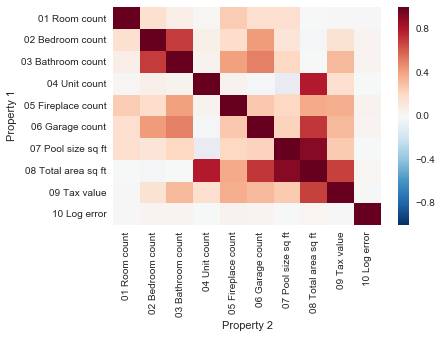

In [5]:
sns.heatmap(coeffs_plot_pivot)

High correlation can be seen between:
1. Unit count and total area in sq ft
2. Bedroom count and bathroom count
3. Pool size and total area in sq ft
4. Garage count and total area in sq ft

Amongst all variables, log error has the highest correlation with total area in sq ft.

There is a small negative correlation between:
1. Unit count and garage count
2. Log error and unit count
3. Log error and pool size

<h1>Question 2</h1>

<h3>Plot 1</h3>

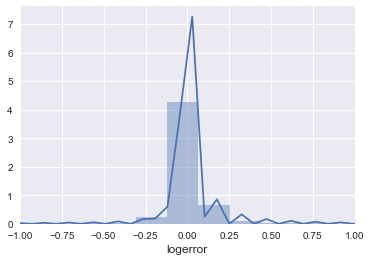

              Mean =  0.0114572196068
Standard Deviation =  0.161077943208


In [6]:
plt.figure(figsize=(6,4))
sns.distplot(train_df.logerror.values)
plt.xlabel('logerror', fontsize=12)
plt.xlim(-1, 1)
plt.show()
print("              Mean = ", train_df.logerror.values.mean())
print("Standard Deviation = ", train_df.logerror.values.std())

This plot shows the univariate distribution of the log error. The mean is slightly greater than zero, so the log error tends to be positive rather than negative. Here, the extreme values have been removed while plotting, and only the values between -1 and 1 have been plotted. 

<h3>Plot 2</h3>

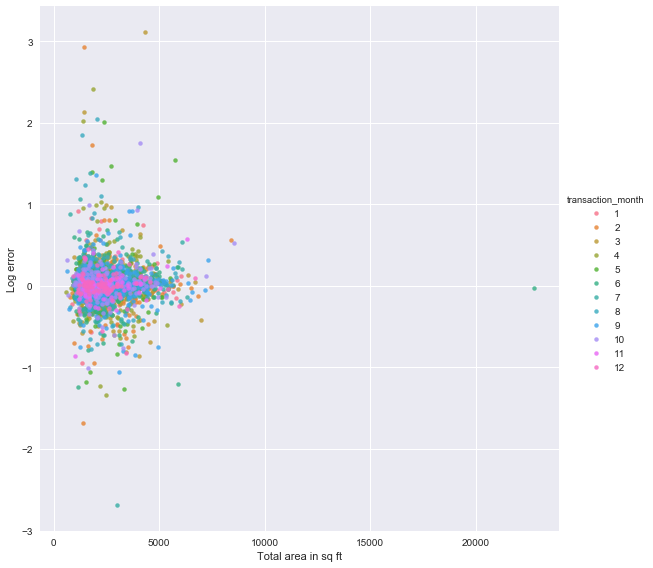

In [30]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month
lm = sns.lmplot(x='finishedsquarefeet15', y='logerror', data=train_df, fit_reg=False, hue='transaction_month', size=8, scatter_kws={"s": 20})
lm.set_axis_labels("Total area in sq ft", "Log error")

This scatter plot shows the log error as a function of the total area in square feet. As it reveals an overall triangular structure tapering towards the right, it can be seen that the log error is closer to zero when the total area of the house is large.

<h3>Plot 3</h3>

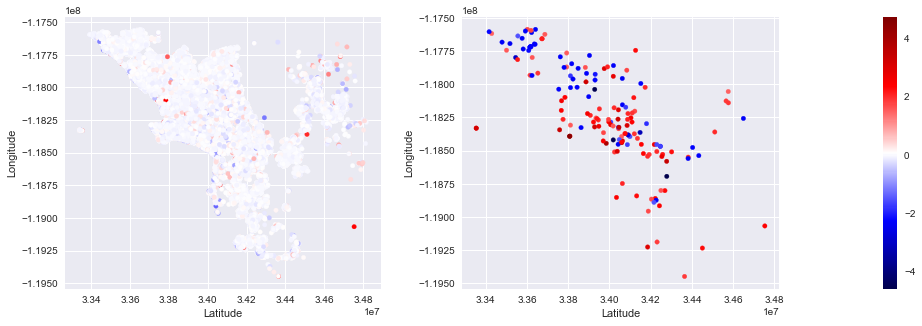

In [29]:
cmap = sns.cubehelix_palette(as_cmap=True)

plot_df = train_df[train_df['logerror'].abs() > 1.5]

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5), gridspec_kw = {'width_ratios':[0.7, 1.1]})
ax1.set(xlabel='Latitude', ylabel='Longitude')
points = ax1.scatter(train_df['latitude'], train_df['longitude'], c=train_df['logerror'], cmap=plt.get_cmap('seismic'), s=20)
f.colorbar(points)
ax2.set(xlabel='Latitude', ylabel='Longitude')
points = ax2.scatter(plot_df['latitude'], plot_df['longitude'], c=plot_df['logerror'], cmap=plt.get_cmap('seismic'), s=20)
cb = f.colorbar(points)
cb.remove()
plt.draw()

This plot shows the log error as a function of latitude and longitude. 
The first plot contains all values of log error (Due to a large number of data points, many points have gotten overwritten).
The second plot contains only those points in which the log error is more than 1.5. For such large values of log error, some clusters of blue(negative values) and red(positive values) can be observed.

<h3>Plot 4</h3>

[<matplotlib.text.Text at 0x11c1b03c8>, <matplotlib.text.Text at 0x11dcc2748>]

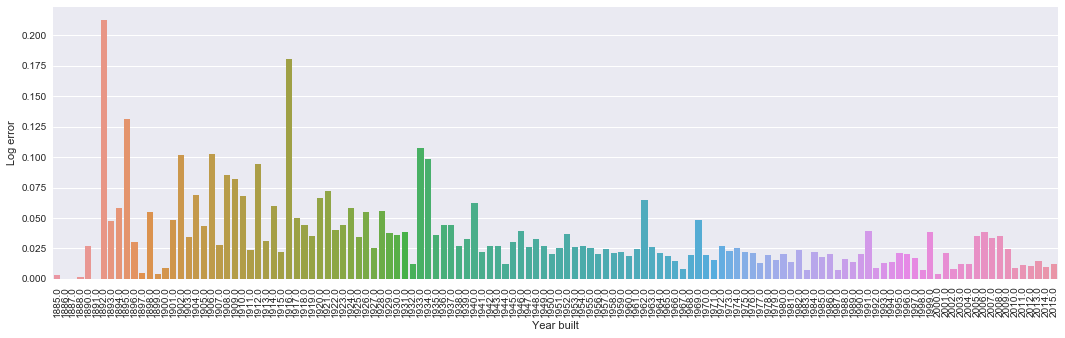

In [32]:
yearbuilt_values = train_df.yearbuilt.unique()
variance = []
for elem in yearbuilt_values:
    temp = train_df[train_df['yearbuilt'] == elem]
    variance.append(temp['logerror'].var())

plt.figure(figsize=(18,5))
plt.xticks(rotation='vertical')
ax = sns.barplot(yearbuilt_values, variance)
ax.set(xlabel='Year built', ylabel='Log error')

This plot displays the variance of log error as a function of the year in which the house was built. It can be seen from this plot that the general trend in the variance is decreasing over the years, which means that the range of the error value is smaller for houses that were built recently.

<h3>Plot 5</h3>

/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[<matplotlib.text.Text at 0x11ccec630>, <matplotlib.text.Text at 0x11ccded30>]

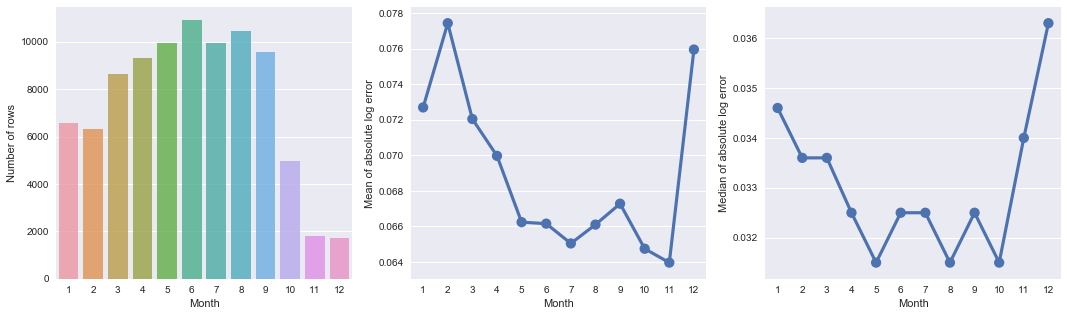

In [28]:
cnt_srs = train_df['transaction_month'].value_counts()

months = train_df.transaction_month.unique()
means = []
medians = []
for elem in months:
    temp = train_df[train_df['transactiondate'].dt.month == elem]
    temp['logerror'] = temp['logerror'].abs()
    means.append(temp['logerror'].mean())
    medians.append(temp['logerror'].median())

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,5))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, ax=ax1)
ax1.set(xlabel='Month', ylabel='Number of rows')
sns.pointplot(months, means, alpha=0.8, ax=ax2)
ax2.set(xlabel='Month', ylabel='Mean of absolute log error')
sns.pointplot(months, medians, alpha=0.8, ax=ax3)
ax3.set(xlabel='Month', ylabel='Median of absolute log error')

This plot contains the following information:
1. Number of rows of data for each month
2. Mean of absolute values of log error for each month
3. Median of absolute values of log error for each month

From the first plot, it can be seen that the number of rows for November and December are very less. However, the mean and median are very high for December and low for November. There are a considerable number of observations for February. Yet, the mean is very high.
In general, the Zestimate model performs reasonably well on months from April to September.

<h1>Question 3</h1>

/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


Mean Squared Error =  0.0232334388791
          R2 score =  0.00385372119725


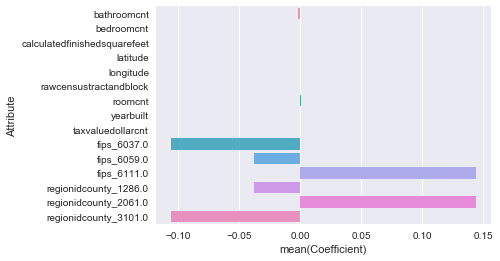

In [14]:
attributes = train_df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
                      'latitude', 'longitude', 'rawcensustractandblock',
                      'regionidcounty', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt',
                      'logerror']]
attributes = attributes.dropna(axis=0, how='any')

X = attributes.ix[:, attributes.columns != 'logerror']
y = attributes.ix[:, attributes.columns == 'logerror']

X = pd.get_dummies(X, columns=['fips', 'regionidcounty'])

X_use = np.matrix(X)
y_use = np.matrix(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size = 1/20, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
import sklearn
print("Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("          R2 score = ", sklearn.metrics.r2_score(y_test, y_pred))

d = {'Attribute': X.columns, 'Coefficient': regressor.coef_[0]}
df = DataFrame(data=d)
sns.barplot(y="Attribute", x="Coefficient", data=df);

The linear regression model has been set up using a some variables from the dataset. As the categorical variables fips and regionidcounty have been considered, the dummy variables created here have the highest weightage in this model.
This model gives a mean squared error of 0.2323, and an R2 score of 0.00385.

<h1>Question 4</h1>

/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/charuta/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Mean Squared Error =  0.0187423989857
          R2 score =  0.00593852948568


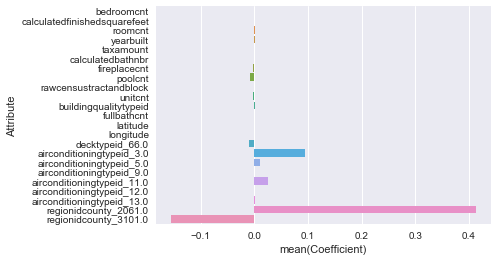

In [6]:
attributes = train_df[['bedroomcnt', 'calculatedfinishedsquarefeet', 'decktypeid', 'airconditioningtypeid', 
                      'roomcnt', 'yearbuilt', 'taxamount', 'calculatedbathnbr', 'fireplacecnt', 'poolcnt', 
                      'rawcensustractandblock', 'unitcnt', 'buildingqualitytypeid', 'fullbathcnt',
                      'latitude', 'longitude', 'regionidcounty',
                      'logerror']]

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

attributes['unitcnt'] = imp.fit_transform(attributes[['unitcnt']]).ravel()
attributes['buildingqualitytypeid'].fillna((attributes['buildingqualitytypeid'].mean()), inplace=True)
attributes['decktypeid'].fillna(0, inplace=True)
attributes['calculatedbathnbr'].fillna((attributes['calculatedbathnbr'].mean()), inplace=True)
attributes['fullbathcnt'].fillna((attributes['fullbathcnt'].mean()), inplace=True)
attributes['fireplacecnt'].fillna(0, inplace=True)
attributes['airconditioningtypeid'] = imp.fit_transform(attributes[['airconditioningtypeid']]).ravel()
attributes['poolcnt'].fillna(0, inplace=True)

attributes = attributes.dropna(axis=0, how='any')

X = attributes.ix[:, attributes.columns != 'logerror']
y = attributes.ix[:, attributes.columns == 'logerror']

X = pd.get_dummies(X, columns=['decktypeid', 'airconditioningtypeid', 'regionidcounty'], drop_first=True)

X['airconditioningtypeid_12.0'] = 0

cols = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'roomcnt', 'yearbuilt',
       'taxamount', 'calculatedbathnbr', 'fireplacecnt', 'poolcnt',
       'rawcensustractandblock', 'unitcnt', 'buildingqualitytypeid',
       'fullbathcnt', 'latitude', 'longitude', 'decktypeid_66.0',
       'airconditioningtypeid_3.0', 'airconditioningtypeid_5.0',
       'airconditioningtypeid_9.0', 'airconditioningtypeid_11.0',
       'airconditioningtypeid_12.0', 'airconditioningtypeid_13.0',
       'regionidcounty_2061.0', 'regionidcounty_3101.0']
       
X = X[cols]

X_use = np.matrix(X)
y_use = np.matrix(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size = 1/20, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

import sklearn
print("Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("          R2 score = ", sklearn.metrics.r2_score(y_test, y_pred))

d = {'Attribute': X.columns, 'Coefficient': regressor.coef_[0]}
df = DataFrame(data=d)
sns.barplot(y="Attribute", x="Coefficient", data=df);

This model is an improvement to the previous model in the following ways:
1. Variable selection has been done. Only those variables which reduce the mean squared error have been included as attributes in this model.
2. Missing values have been handled. Empty fields have been replaced with the mean or mode of the column as appropriate.
3. While encoding categorical variables, the first dummy variable has been dropped to improve the model accuracy.

This model gives a mean squared error of 0.0187, and an R2 score of 0.0059.

<h1>Question 5</h1>

In [7]:
test_df = pd.read_csv('./input/sample_submission.csv') 
test_df = test_df.rename(columns={'ParcelId': 'parcelid'})
test_df = test_df.merge(properties, how='left', on='parcelid')

In [8]:
test_attributes = test_df[['bedroomcnt', 'calculatedfinishedsquarefeet', 'decktypeid', 'airconditioningtypeid', 
                      'roomcnt', 'yearbuilt', 'taxamount', 'calculatedbathnbr', 'fireplacecnt', 'poolcnt', 
                      'rawcensustractandblock', 'unitcnt', 'buildingqualitytypeid', 'fullbathcnt',
                      'latitude', 'longitude', 'regionidcounty']]

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

test_attributes['bedroomcnt'] = imp.fit_transform(test_attributes[['bedroomcnt']]).ravel()
test_attributes['calculatedfinishedsquarefeet'].fillna((test_attributes['calculatedfinishedsquarefeet'].mean()), inplace=True)
test_attributes['roomcnt'] = imp.fit_transform(test_attributes[['roomcnt']]).ravel()
test_attributes['yearbuilt'] = imp.fit_transform(test_attributes[['yearbuilt']]).ravel()
test_attributes['taxamount'].fillna((test_attributes['taxamount'].mean()), inplace=True)
test_attributes['rawcensustractandblock'].fillna((test_attributes['rawcensustractandblock'].mean()), inplace=True)

test_attributes['latitude'].fillna((test_attributes['latitude'].mean()), inplace=True)
test_attributes['longitude'].fillna((test_attributes['longitude'].mean()), inplace=True)
test_attributes['regionidcounty'] = imp.fit_transform(test_attributes[['regionidcounty']]).ravel()

test_attributes['unitcnt'] = imp.fit_transform(test_attributes[['unitcnt']]).ravel()
test_attributes['buildingqualitytypeid'].fillna((test_attributes['buildingqualitytypeid'].mean()), inplace=True)
test_attributes['decktypeid'].fillna(0, inplace=True)
test_attributes['calculatedbathnbr'].fillna((test_attributes['calculatedbathnbr'].mean()), inplace=True)
test_attributes['fullbathcnt'].fillna((test_attributes['fullbathcnt'].mean()), inplace=True)
test_attributes['fireplacecnt'].fillna(0, inplace=True)
test_attributes['airconditioningtypeid'] = imp.fit_transform(test_attributes[['airconditioningtypeid']]).ravel()
test_attributes['poolcnt'].fillna(0, inplace=True)

X = pd.get_dummies(test_attributes, columns=['decktypeid', 'airconditioningtypeid', 'regionidcounty'], drop_first=True)

X_test = np.matrix(X)

/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/charuta/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [11]:
y_pred = regressor.predict(X_test)

In [9]:
sample_file = pd.read_csv('./input/sample_submission.csv')

In [10]:
sample_file.columns

Index(['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712'], dtype='object')

In [28]:
sample_file = pd.read_csv('./input/sample_submission.csv') 
for c in sample_file.columns[sample_file.columns != 'ParcelId']:
    sample_file[c] = y_pred

print('Preparing the csv file ...')
sample_file.to_csv('predicted_results_submit.csv', index=False, float_format='%.4f')
print("Finished writing the file")

Preparing the csv file ...
Finished writing the file


In [29]:
sample_file.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.019727,0.017574,0.022637,0.019727,0.017574,0.022637
1,10759547,0.019727,0.017574,0.022637,0.019727,0.017574,0.022637
2,10843547,0.900490,0.898337,0.903400,0.900490,0.898337,0.903400
3,10859147,0.049771,0.047617,0.052681,0.049771,0.047617,0.052681
4,10879947,0.017589,0.015435,0.020499,0.017589,0.015435,0.020499


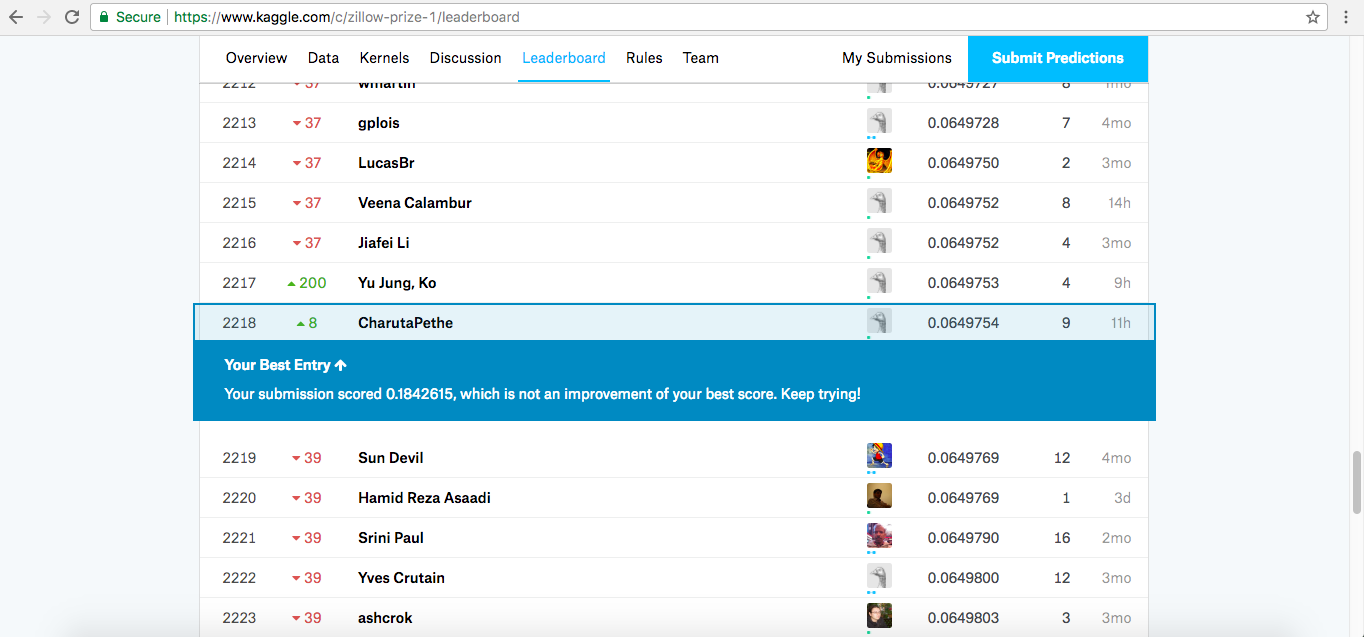

In [13]:
from IPython.display import Image
Image("./Kaggle_rank.png")

The submission on Kaggle has been ranked as 2218, with a score of 0.0649754.

<h1>Question 6</h1>

Please see the attached report in PDF format.